In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['Womens Clothing E-Commerce Reviews.csv']


In [147]:
data = pd.read_csv('../input/Womens Clothing E-Commerce Reviews.csv')
data = data[['Review Text','Rating']]
data = data.dropna() # remocao de valores NaN

# Questão 2a.
## Cleaning text

In [148]:
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                       text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) \
       + ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    
    output = ''
    output = output + tokenized[0]
    for i in tokenized[1:]:
        output = output + ' ' + i
        
    return output

In [149]:
data['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [150]:
data['Review Text'] = data['Review Text'].apply(tokenizer)
data['Review Text'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store gla...
2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count = CountVectorizer()

bag = count.fit_transform(data['Review Text'])

tfidf = TfidfTransformer()

f_vectors = tfidf.fit_transform(bag)

In [152]:
sample_reviews = data['Review Text'][0], data['Review Text'][11]
sample_reviews

('absolutely wonderful silky sexy comfortable',
 'dress perfection pretty flattering')

In [153]:
sample_fvs = f_vectors[0].data, f_vectors[11].data
sample_fvs

(array([0.3852131 , 0.47450237, 0.5486825 , 0.5029912 , 0.26908314]),
 array([0.27706178, 0.40779956, 0.34869201, 0.79708856]))

# Questão 2b.

In [154]:
training_samples = 18111 # Trains on 18111 samples (80%)
test_samples = 2264 # Tests on 2264 samples (10%) 
validation_samples = 2264 # Validates on 2264 samples (10%)
labels = data['Rating'].values
data = f_vectors.toarray()

In [155]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples:training_samples + test_samples]
y_test = labels[training_samples:training_samples + test_samples]
x_val = data[training_samples + test_samples: training_samples + test_samples + validation_samples]
y_val = labels[training_samples + test_samples: training_samples + test_samples + validation_samples]

In [39]:
from sklearn.neural_network import MLPClassifier

acc = []
loss = []

clf = MLPClassifier(learning_rate='constant',
                    learning_rate_init=0.01, 
                    hidden_layer_sizes=128, 
                    activation='relu', 
                    batch_size=256, 
                    warm_start=True, 
                    max_iter=1)

for i in range(50):
    sc = clf.fit(x_train, y_train).score(x_val, y_val)
    acc.append(sc)
    loss.append(clf.loss_)
    print('Accuracy: {} - Loss: {}'.format(sc, clf.loss_))

Accuracy: 0.6139575971731449 - Loss: 0.958352936098112
Accuracy: 0.6033568904593639 - Loss: 0.6331023861067567
Accuracy: 0.5781802120141343 - Loss: 0.4248324555412493
Accuracy: 0.5772968197879859 - Loss: 0.2628684781648509
Accuracy: 0.5706713780918727 - Loss: 0.1385813600297791
Accuracy: 0.5693462897526502 - Loss: 0.06151982283194057
Accuracy: 0.5777385159010601 - Loss: 0.028853727103030212
Accuracy: 0.5742049469964664 - Loss: 0.016981128916122946
Accuracy: 0.5746466431095406 - Loss: 0.012937459671917553
Accuracy: 0.5728798586572438 - Loss: 0.01111549396781352
Accuracy: 0.575530035335689 - Loss: 0.010341416835374189
Accuracy: 0.573321554770318 - Loss: 0.009502557866592144
Accuracy: 0.5719964664310954 - Loss: 0.008948953543313931
Accuracy: 0.575530035335689 - Loss: 0.008699115105303771
Accuracy: 0.5737632508833922 - Loss: 0.008134714969369817
Accuracy: 0.573321554770318 - Loss: 0.007802968329071622
Accuracy: 0.5746466431095406 - Loss: 0.007512511371303121
Accuracy: 0.573321554770318 - L

In [42]:
from matplotlib import pyplot as plt

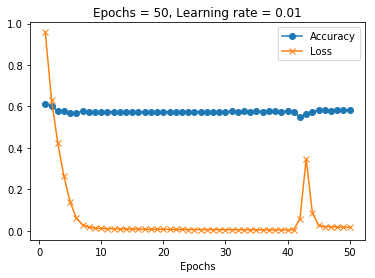

In [45]:
plt.plot(range(1, 51), acc, marker='o', label='Accuracy')
plt.plot(range(1, 51), loss, marker='x', label='Loss')
plt.xlabel('Epochs')
plt.title('Epochs = 50, Learning rate = 0.01')
plt.legend()
plt.show()

In [47]:
accuracy_test = clf.score(x_test, y_test)
print('Accuracy for test set: {}'.format(accuracy_test))

Accuracy for test set: 0.5892226148409894


# Questão 2c.

In [156]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

In [157]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [168]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D
from keras.optimizers import RMSprop, Adamax

model = Sequential()
model.add(Conv1D(128, 5, input_shape=(14019, 1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 14015, 128)        768       
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 55        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


In [159]:
x_train.shape

(18111, 14019)

In [160]:
# data must be in 3d shape to cnn

x_train = np.expand_dims(x_train, axis=2) 
x_val = np.expand_dims(x_val, axis=2) 
x_test = np.expand_dims(x_test, axis=2) 

In [161]:
x_train.shape

(18111, 14019, 1)

In [169]:
opt = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
epochs=50,
batch_size=256,
validation_data=(x_val, y_val))

Train on 18111 samples, validate on 2264 samples
Epoch 1/50
18111/18111 [==============================] - 32s 2ms/step - loss: 1.3062 - acc: 0.5480 - val_loss: 1.2117 - val_acc: 0.5574
Epoch 2/50
18111/18111 [==============================] - 32s 2ms/step - loss: 1.2212 - acc: 0.5565 - val_loss: 1.2097 - val_acc: 0.5574
Epoch 3/50
18111/18111 [==============================] - 32s 2ms/step - loss: 1.2213 - acc: 0.5565 - val_loss: 1.2109 - val_acc: 0.5574
Epoch 4/50
18111/18111 [==============================] - 32s 2ms/step - loss: 1.2209 - acc: 0.5565 - val_loss: 1.2108 - val_acc: 0.5574
Epoch 5/50
18111/18111 [==============================] - 32s 2ms/step - loss: 1.2211 - acc: 0.5565 - val_loss: 1.2097 - val_acc: 0.5574
Epoch 6/50
18111/18111 [==============================] - 32s 2ms/step - loss: 1.2208 - acc: 0.5565 - val_loss: 1.2092 - val_acc: 0.5574
Epoch 7/50
18111/18111 [==============================] - 32s 2ms/step - loss: 1.2209 - acc: 0.5565 - val_loss: 1.2097 - val_acc:

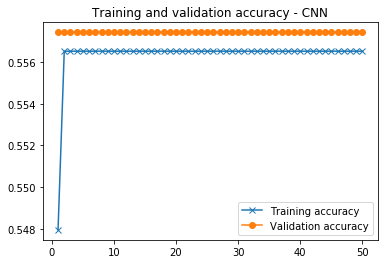

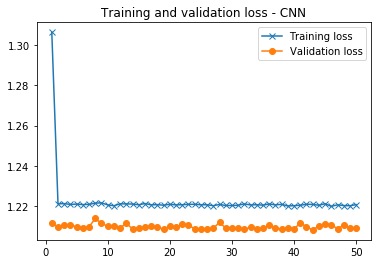

In [171]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy', marker='x')
plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
plt.title('Training and validation accuracy - CNN')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training loss', marker='x')
plt.plot(epochs, val_loss, label='Validation loss', marker='o')
plt.title('Training and validation loss - CNN')
plt.legend()

plt.show()

In [172]:
loss, acc = model.evaluate(x=x_test, y=y_test, batch_size=256, verbose=1)
print('Loss: {} - Accuracy: {} for test set'.format(loss, acc))

2264/2264 [==============================] - 1s 612us/step
Loss: 1.254382873592444 - Accuracy: 0.5291519436735146 for test set
